# rf211_paramconv
Addition and convolution: working with a pdf with a convolution operator in terms of a parameter

This tutorial requires FFT3 to be enabled.




**Author:** Wouter Verkerke  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:17 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooDataHist.h"
#include "RooGaussian.h"
#include "RooGenericPdf.h"
#include "RooFormulaVar.h"
#include "RooFFTConvPdf.h"
#include "RooPlot.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "TH2.h"
using namespace RooFit;

Setup component pdfs
---------------------------------------

Gaussian g(x ; mean,sigma)

In [2]:
RooRealVar x("x", "x", -10, 10);
RooRealVar mean("mean", "mean", -3, 3);
RooRealVar sigma("sigma", "sigma", 0.5, 0.1, 10);
RooGaussian modelx("gx", "gx", x, mean, sigma);

Block function in mean

In [3]:
RooRealVar a("a", "a", 2, 1, 10);
RooGenericPdf model_mean("model_mean", "abs(mean)<a", RooArgList(mean, a));

Convolution in mean parameter model = g(x,mean,sigma) (x) block(mean)

In [4]:
x.setBins(1000, "cache");
mean.setBins(50, "cache");
RooFFTConvPdf model("model", "model", mean, modelx, model_mean);

Configure convolution to construct a 2-D cache in (x,mean)
rather than a 1-d cache in mean that needs to be recalculated
for each value of x

In [5]:
model.setCacheObservables(x);
model.setBufferFraction(1.0);

Integrate model over mean projModel = Int model dmean

In [6]:
RooAbsPdf *projModel = model.createProjection(mean);

[#1] INFO:Eval -- RooRealVar::setRange(mean) new range named 'refrange_fft_model' created with bounds [-3,3]
[#0] WARNING:Eval -- The FFT convolution 'model' will run with 50 bins. A decent accuracy for difficult convolutions is typically only reached with n >= 1000. Suggest to increase the number of bins of the observable 'mean'.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(gx_Int[mean,x]) using numeric integrator RooIntegrator1D to calculate Int(mean)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_mean_Int[mean]) using numeric integrator RooIntegrator1D to calculate Int(mean)
[#0] WARNING:Integration -- RooRombergIntegrator::integral: integral of model_mean over range (-6,6) did not converge after 20 steps
   [1] h = 1 , s = 0
   [2] h = 0.25 , s = 6
   [3] h = 0.0625 , s = 3
   [4] h = 0.015625 , s = 4.5
   [5] h = 0.00390625 , s = 3.75
   [6] h = 0.000976562 , s = 4.125
   [7] h = 0.000244141 , s = 3.9375
   [8] h = 6.10352e-05 , s = 4.03125
   [9] h = 1.52588

Generate 1000 toy events

In [7]:
std::unique_ptr<RooDataHist> d{projModel->generateBinned(x, 1000)};

[#0] WARNING:Eval -- The FFT convolution 'model' will run with 50 bins. A decent accuracy for difficult convolutions is typically only reached with n >= 1000. Suggest to increase the number of bins of the observable 'mean'.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(gx_Int[mean,x]) using numeric integrator RooIntegrator1D to calculate Int(mean)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_mean_Int[mean]) using numeric integrator RooIntegrator1D to calculate Int(mean)
[#0] WARNING:Integration -- RooRombergIntegrator::integral: integral of model_mean over range (-6,6) did not converge after 20 steps
   [1] h = 1 , s = 0
   [2] h = 0.25 , s = 6
   [3] h = 0.0625 , s = 3
   [4] h = 0.015625 , s = 4.5
   [5] h = 0.00390625 , s = 3.75
   [6] h = 0.000976562 , s = 4.125
   [7] h = 0.000244141 , s = 3.9375
   [8] h = 6.10352e-05 , s = 4.03125
   [9] h = 1.52588e-05 , s = 3.98438
   [10] h = 3.8147e-06 , s = 4.00781
   [11] h = 9.53674e-07 , s = 3.99609
   [12] h = 2.3

Fit pdf to toy data

In [8]:
projModel->fitTo(*d, Verbose(), PrintLevel(-1));

[#0] WARNING:Eval -- The FFT convolution 'model' will run with 50 bins. A decent accuracy for difficult convolutions is typically only reached with n >= 1000. Suggest to increase the number of bins of the observable 'mean'.
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(model) creating new cache 0x7f01e2077b10 with pdf gx_CONV_model_mean_CACHE_Obs[x,mean]_NORM_x_mean for nset (x,mean) with code 1 from preexisting content.
[#1] INFO:Fitting -- RooAbsPdf::fitTo(model_Int[mean]_Norm[mean,x]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- using CPU computation library compiled with -mavx2
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_Int[mean]_Norm[mean,x]_genData) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#0] WARNING:Minimization -- RooAbsMinimizerFcn::synchronize: WARNING: no initial error estimate available for a: 

Warning in <ROOT::Math::Fitter::CalculateHessErrors>: Error when calculating Hessian


Plot data and fitted pdf

In [9]:
RooPlot *frame = x.frame(Bins(25));
d->plotOn(frame);
projModel->plotOn(frame);

[#0] WARNING:Eval -- The FFT convolution 'model' will run with 50 bins. A decent accuracy for difficult convolutions is typically only reached with n >= 1000. Suggest to increase the number of bins of the observable 'mean'.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(gx_Int[mean,x]) using numeric integrator RooIntegrator1D to calculate Int(mean)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_mean_Int[mean]) using numeric integrator RooIntegrator1D to calculate Int(mean)
[#0] WARNING:Integration -- RooRombergIntegrator::integral: integral of model_mean over range (-6,6) did not converge after 20 steps
   [1] h = 1 , s = 0
   [2] h = 0.25 , s = 6
   [3] h = 0.0625 , s = 3
   [4] h = 0.01562 , s = 4.5
   [5] h = 0.003906 , s = 3.75
   [6] h = 0.0009766 , s = 4.125
   [7] h = 0.0002441 , s = 3.938
   [8] h = 6.104e-05 , s = 4.031
   [9] h = 1.526e-05 , s = 3.984
   [10] h = 3.815e-06 , s = 4.008
   [11] h = 9.537e-07 , s = 3.996
   [12] h = 2.384e-07 , s = 4.002
   [

Make 2d histogram of model(x;mean)

In [10]:
TH1 *hh = model.createHistogram("hh", x, Binning(50), YVar(mean, Binning(50)), ConditionalObservables(mean));
hh->SetTitle("histogram of model(x|mean)");
hh->SetLineColor(kBlue);

[#0] WARNING:Eval -- The FFT convolution 'model' will run with 50 bins. A decent accuracy for difficult convolutions is typically only reached with n >= 1000. Suggest to increase the number of bins of the observable 'mean'.
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(model) creating new cache 0x7f01e2682ba0 with pdf gx_CONV_model_mean_CACHE_Obs[x,mean]_NORM_x for nset (x) with code 3 from preexisting content.


Draw frame on canvas

In [11]:
TCanvas *c = new TCanvas("rf211_paramconv", "rf211_paramconv", 800, 400);
c->Divide(2);
c->cd(1);
gPad->SetLeftMargin(0.15);
frame->GetYaxis()->SetTitleOffset(1.4);
frame->Draw();
c->cd(2);
gPad->SetLeftMargin(0.20);
hh->GetZaxis()->SetTitleOffset(2.5);
hh->Draw("surf");

Draw all canvases 

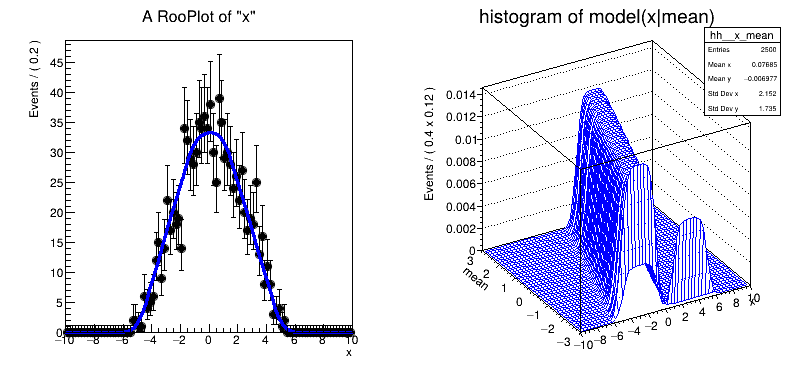

In [12]:
gROOT->GetListOfCanvases()->Draw()